## TAREA_1_Daniel_Rojas

In [77]:
import os 
#import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ACP_PRINCE import *
os.chdir('/Users/danielrojaschacon/Documents/Cursos/Experto ML- Promidat/Metodos no supervisados/Datos_Tarea' )

df=pd.read_csv('incendios_Algeria.csv',index_col=None,delimiter=',',decimal=".")
df.describe()


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,31.180328,67.975410,16.000000,0.842623,74.672951,12.314754,53.160656,3.655738,15.426230,5.577869
std,3.320401,11.154411,2.848807,2.409208,15.558713,11.274360,51.778265,3.021768,14.474302,6.343051
min,22.000000,45.000000,11.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,29.000000,60.000000,14.000000,0.000000,65.925000,3.725000,10.050000,1.125000,5.100000,0.500000
50%,31.000000,68.000000,16.000000,0.000000,80.900000,9.450000,35.550000,2.650000,11.200000,3.000000
75%,34.000000,77.750000,18.000000,0.500000,86.775000,16.300000,79.025000,5.600000,21.675000,8.700000
max,37.000000,89.000000,26.000000,16.800000,90.300000,54.200000,220.400000,12.500000,67.400000,30.200000


Para la temperatura el promedio es de 31,18 C con una desviacion estandar de 3,32 C, la temperatura maxima es de 37C y la minima de 22 C. 
Para la humedad relativa el promedio es de 67,97% con una desviacion estandar de 11,15%, la RH maxima es de 89% y la minima de 45%.
Esto podria realizarse con todas las variables medidas.
Podemos rescatar que la medida con mayor variabilidad es la llamada DC con 51,77 de desviacion estandar y por otra parte la medida con menor variabilidad es el de lluvia con un 2,409. 

In [2]:
correlacion=df.corr()
correlacion

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,1.000000,-0.660151,-0.228035,-0.486947,0.748423,0.541489,0.532838,0.663871,0.542210,0.608367
RH,-0.660151,1.000000,0.245774,0.329163,-0.653153,-0.347080,-0.314271,-0.586410,-0.338233,-0.476067
Ws,-0.228035,0.245774,1.000000,0.349321,-0.211069,0.039394,0.099231,-0.039266,0.062212,0.029637
Rain,-0.486947,0.329163,0.349321,1.000000,-0.573476,-0.265371,-0.283652,-0.366425,-0.271951,-0.292914
FFMC,0.748423,-0.653153,-0.211069,-0.573476,1.000000,0.608512,0.575221,0.790086,0.600707,0.675553
DMC,0.541489,-0.347080,0.039394,-0.265371,0.608512,1.000000,0.962193,0.750098,0.995551,0.901759
DC,0.532838,-0.314271,0.099231,-0.283652,0.575221,0.962193,1.000000,0.717591,0.982554,0.869911
ISI,0.663871,-0.586410,-0.039266,-0.366425,0.790086,0.750098,0.717591,1.000000,0.746761,0.944062
BUI,0.542210,-0.338233,0.062212,-0.271951,0.600707,0.995551,0.982554,0.746761,1.000000,0.900417
FWI,0.608367,-0.476067,0.029637,-0.292914,0.675553,0.901759,0.869911,0.944062,0.900417,1.000000


<AxesSubplot:>

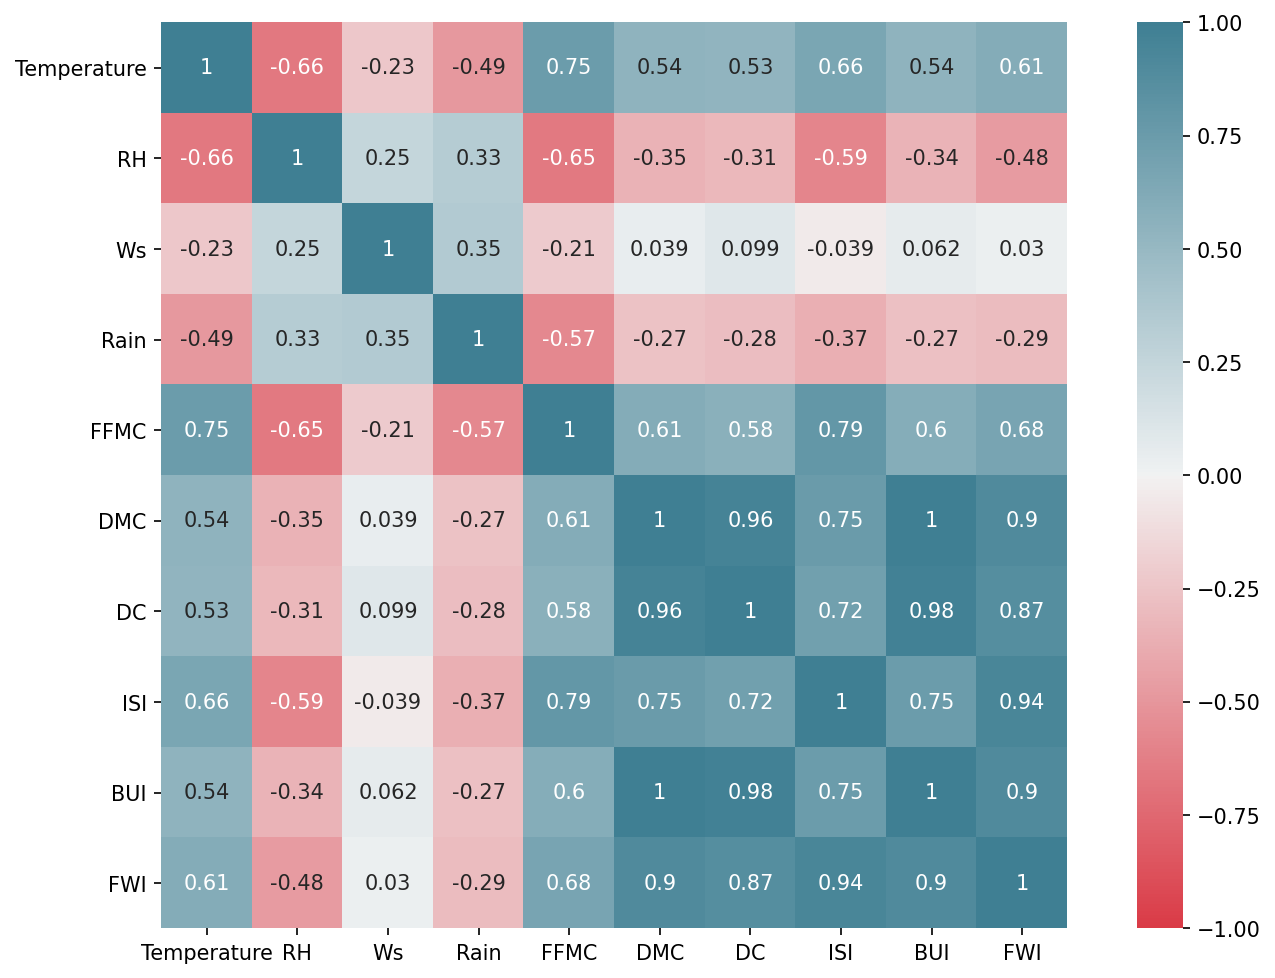

In [3]:
fig, ax = plt.subplots(figsize=(12, 8), dpi = 150)

paleta = sns.diverging_palette(220, 10,as_cmap=True).reversed()

sns.heatmap(correlacion, vmin= -1, vmax=1, cmap= paleta,
            square=True, annot=True, ax=ax)

Segun el grafico anterior una correlacion positiva alta de 0,98 de coeficiente de correlacion, se da entre las variables DC y BUI,esto quiere decir que cuando una de las dos variables aumenta, la otra variable tambien lo hace a una taza similar. 

Por otra parte una correlacion negativa destacable de -0,65 de coeficiente de correlacion se da entre las variables FFMC y RH, esto quiere decir que cuando una aumenta la otra disminuye pero en una menor taza en comparacion a las 2 variables ya mencionadas anteriormente. 

En el caso de las variables BUI y DMC hay una correlacion positiva perfecta, osea ambas aumentan o disminuyen a una misma taza. 

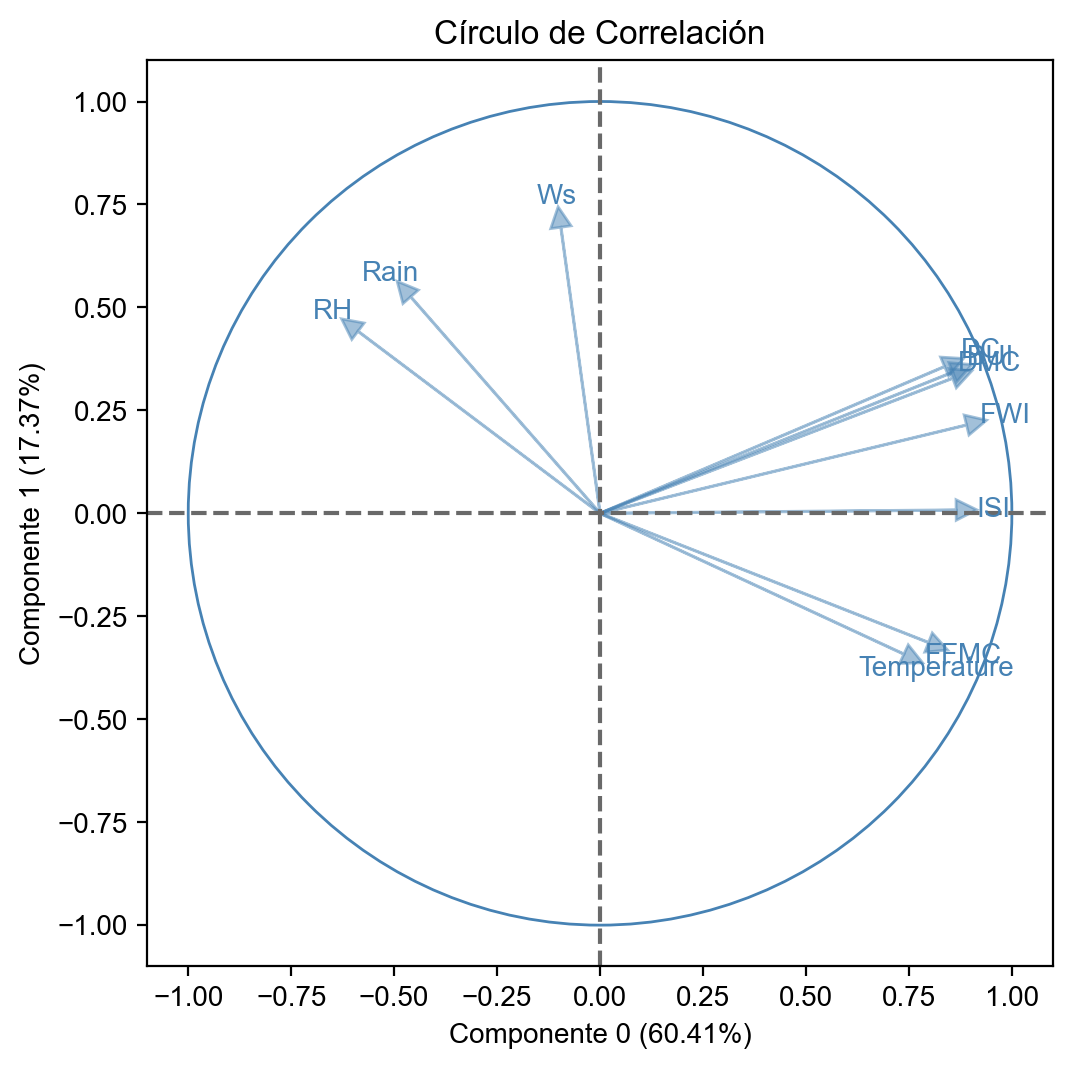

In [4]:
os.chdir('/Users/danielrojaschacon/Documents/Cursos/Experto ML- Promidat/Git-Promidat/Promidat/Metodos no supervisados' )


newdf = df.select_dtypes(include=np.number) #elimina la columna string
acp = ACP(newdf,n_componentes=3)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (10,6), dpi = 200)
acp.plot_circulo()


<br> 1. Segun el circulo de correlacion las variables FFMC y temperatura estan correlacionadas de manera positiva. 
<br> 2. Ademas las variables DC,DMC,BUI tienen la correlacion mas fuerte entre todas las variables.
<br>3. WS,Rain y RH tienen una correlacion positiva entre si, sin embargo es una correlacion mas debil en comparacion a las demas variables. 

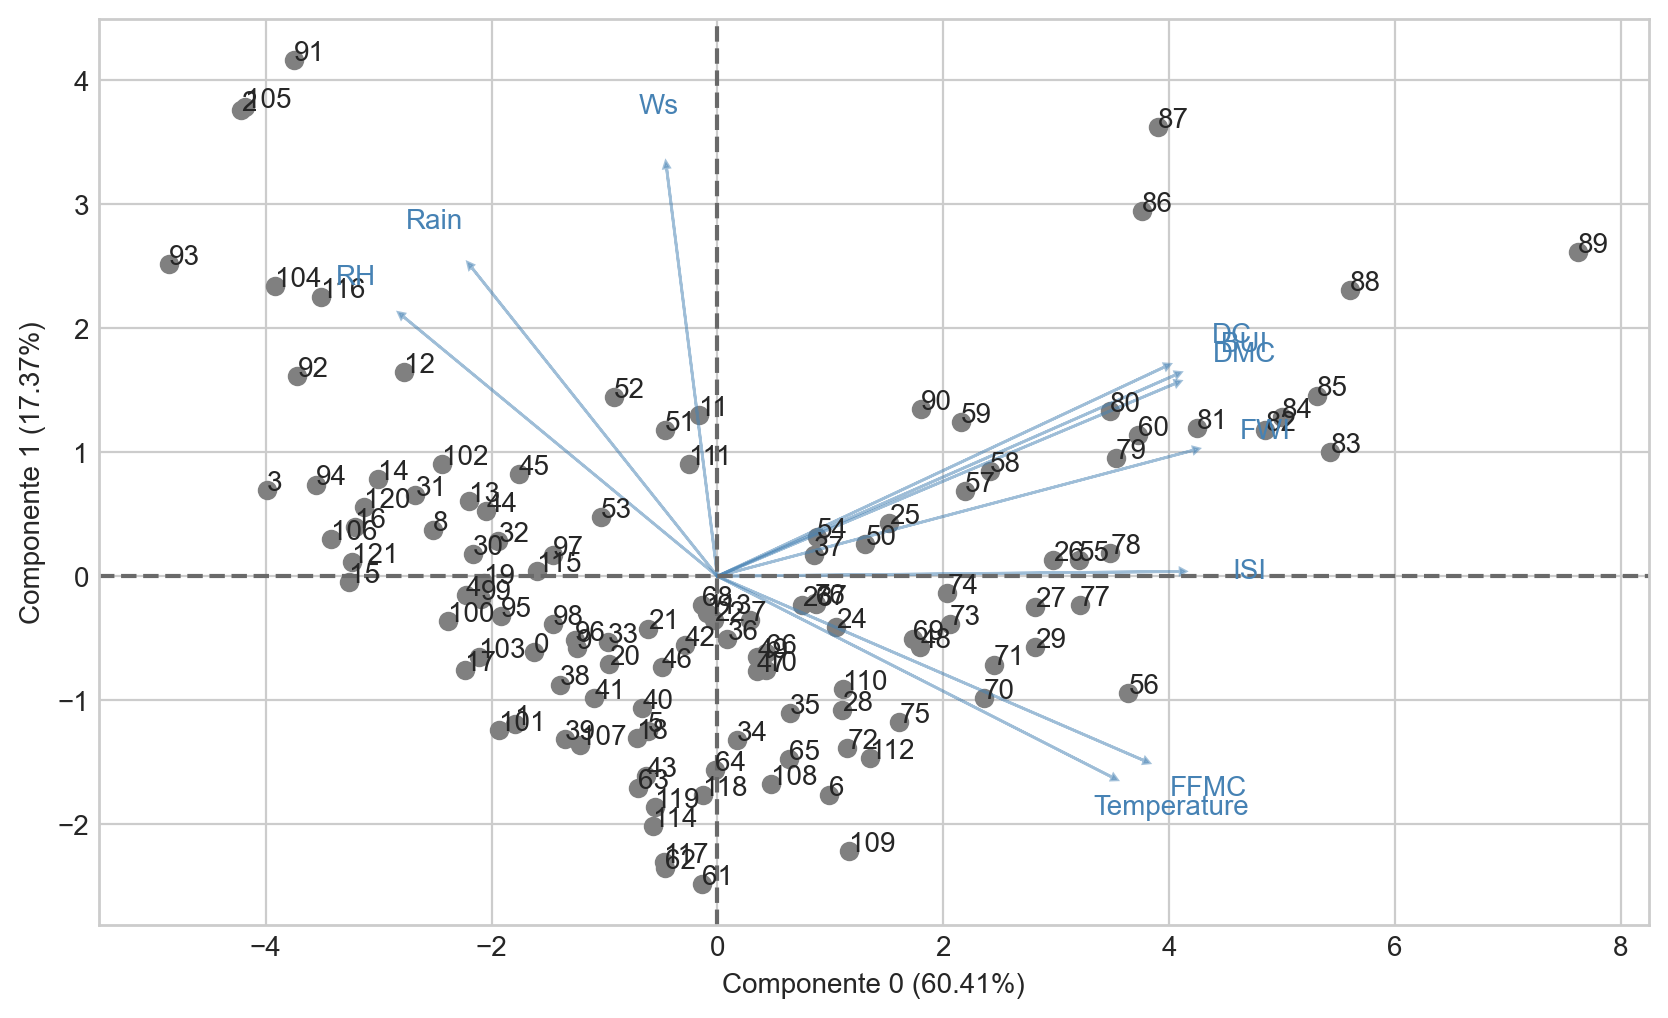

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (10,6), dpi = 200)
acp.plot_sobreposicion()

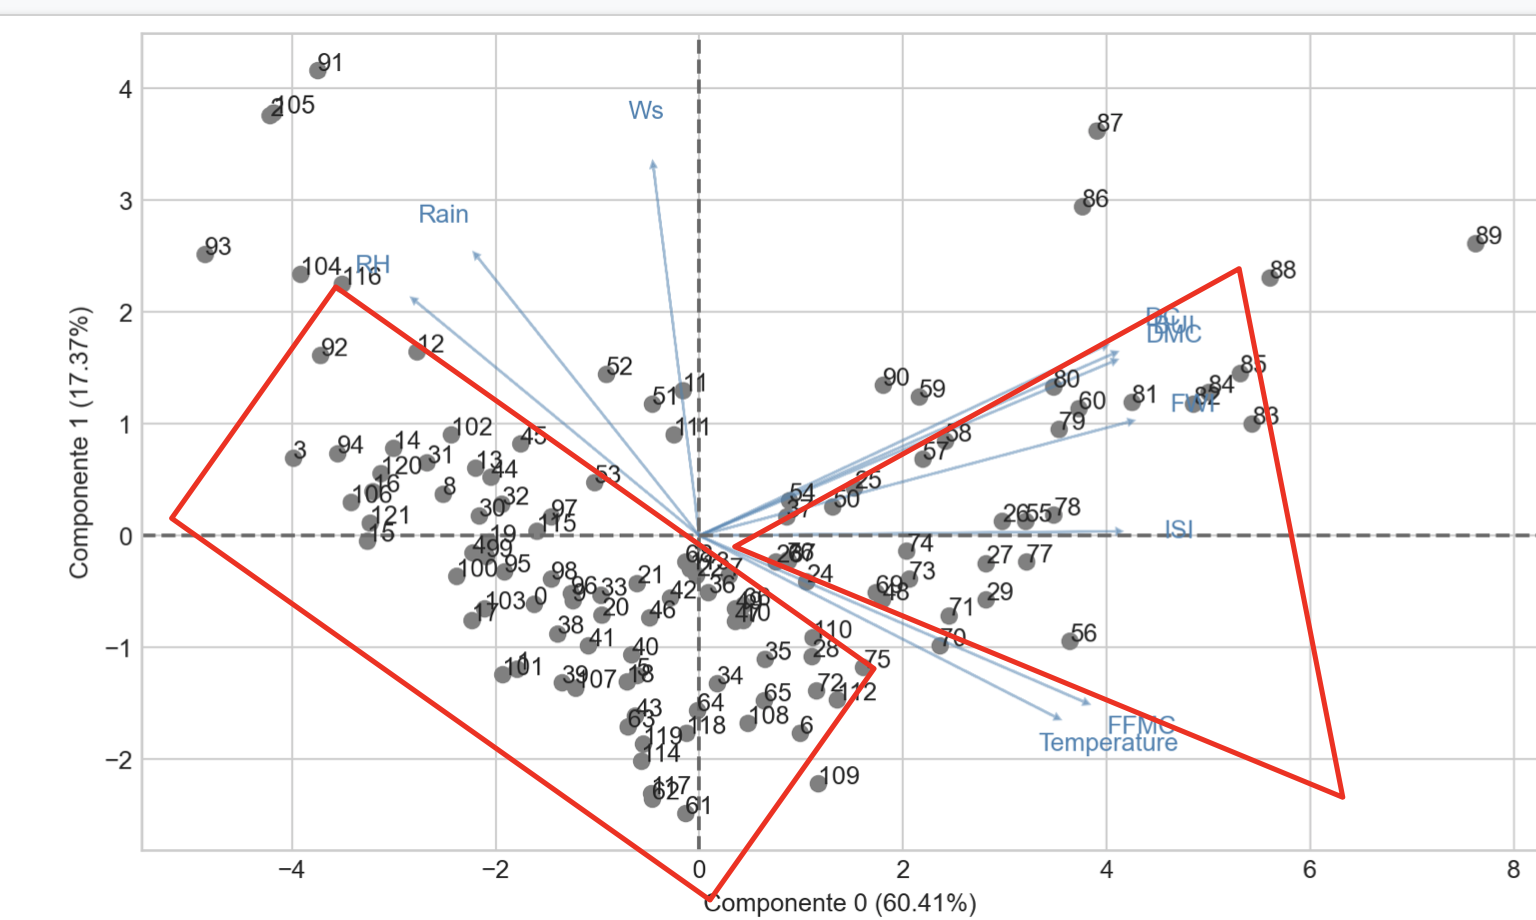

El grafico anterior nos permite decir que probablemente existen 2 agrupaciones que estan mayoritariamente representados por: 
1. Los elementos de los cuadrantes 1,3,4 que estan por debajo de los vectores de temperatura, RH. Las variables dominantes son Temp y RH y al ser de correlacion inversa provoca el comportamiento de que esten por debajo de los vectores. 
2. Los elementos de los cuadrantes 2 y 4 y que estan entre FFMC y DMC. Y al tener cierta correlacion positiva provoca que los elementos esten dentro de ambos vectores. 
3. Los demas elementos que no se pueden asociar a esos 2 clusters visuales, se deberian de utilizar un metodo de clusterizacion y asi determinar una asociacion correcta.

In [6]:
os.chdir('/Users/danielrojaschacon/Documents/Cursos/Experto ML- Promidat/Metodos no supervisados/Datos_Tarea' )

df=pd.read_csv('players1.csv',index_col=None,delimiter=',')
newdf = df.select_dtypes(include=np.number) #elimina la columna string

acp = ACP(newdf,n_componentes=3)

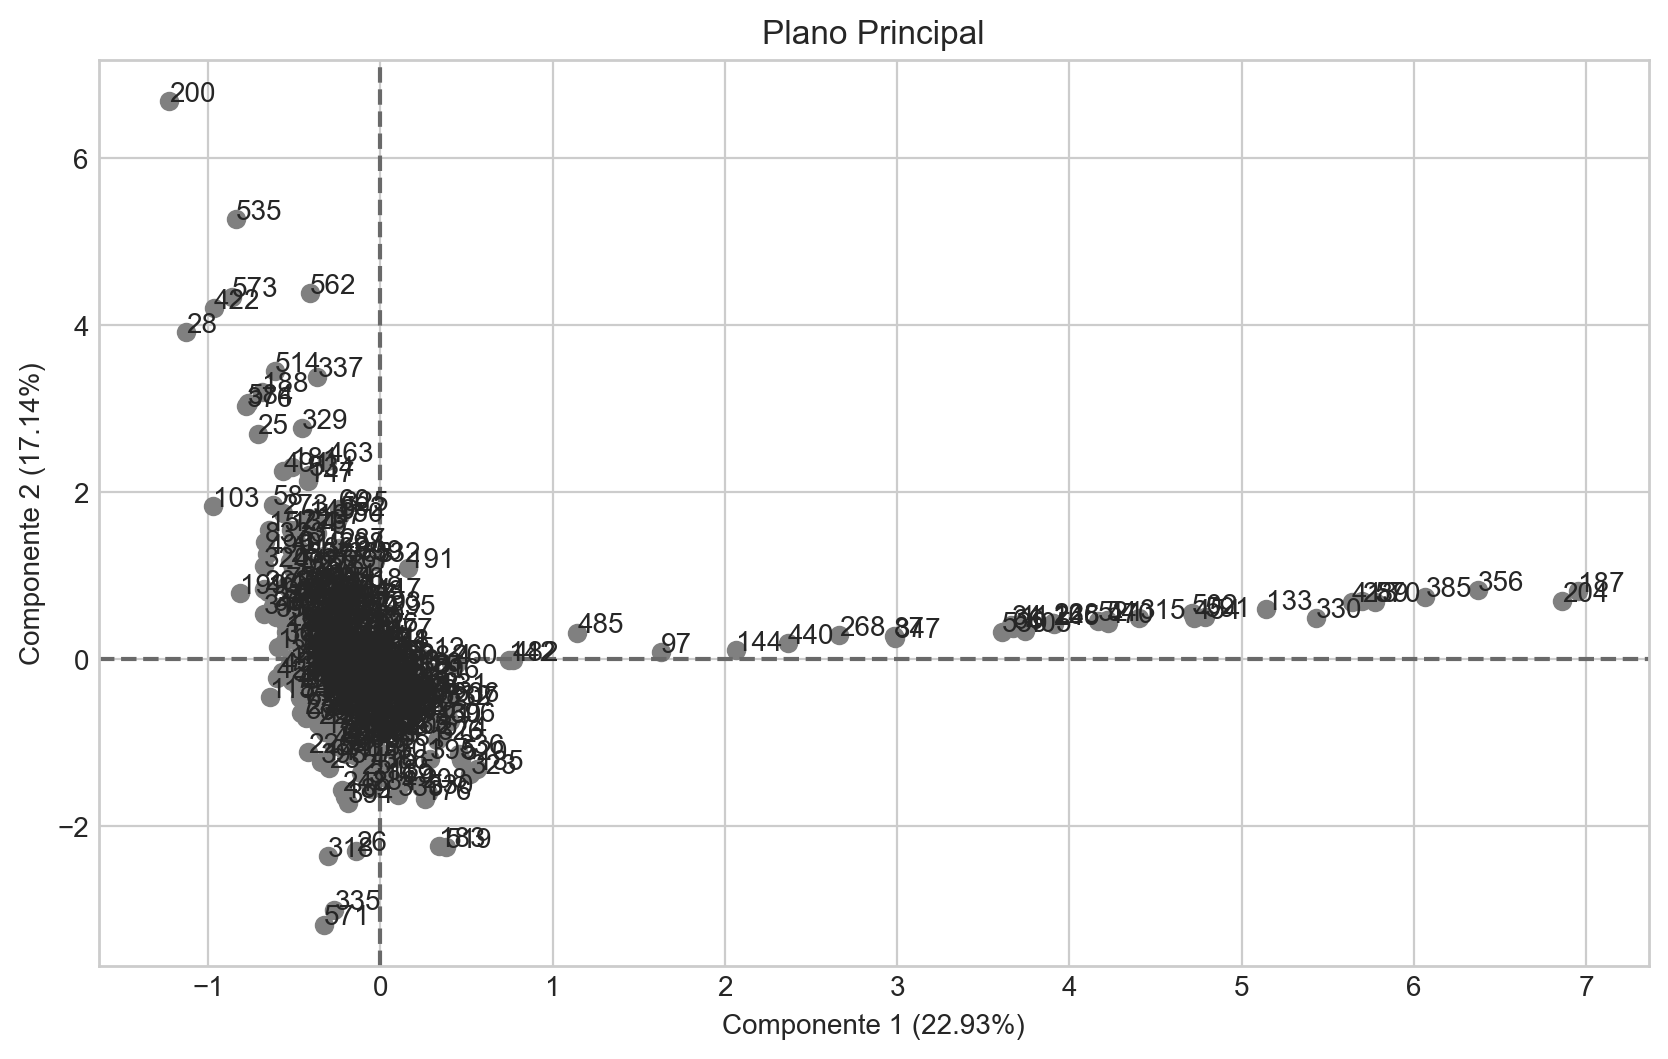

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (10,6), dpi = 200)
acp.plot_plano_principal(ejes = [1, 2])

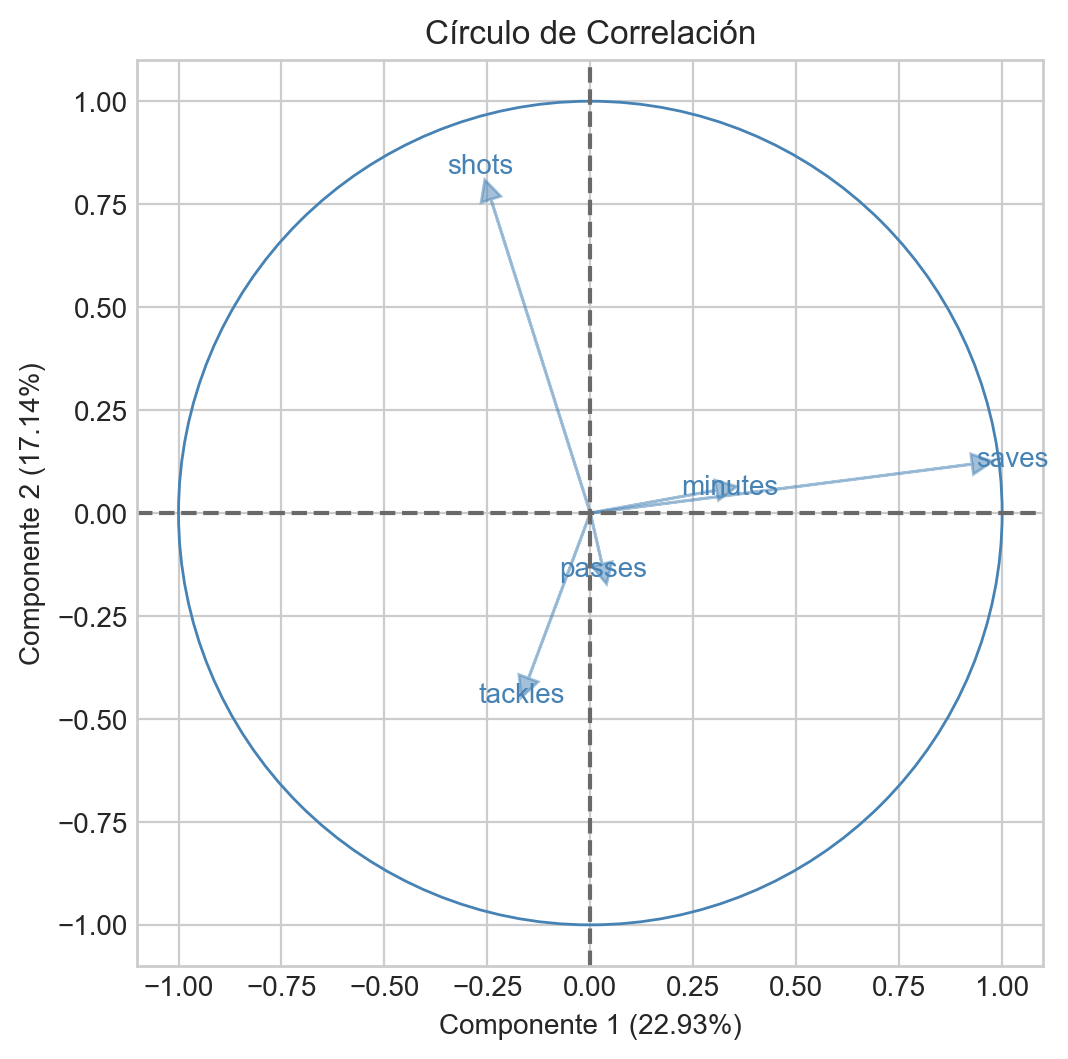

In [8]:
# Plotea el círculo de correlación
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (10,6), dpi = 200)
acp.plot_circulo(ejes = [1, 2])

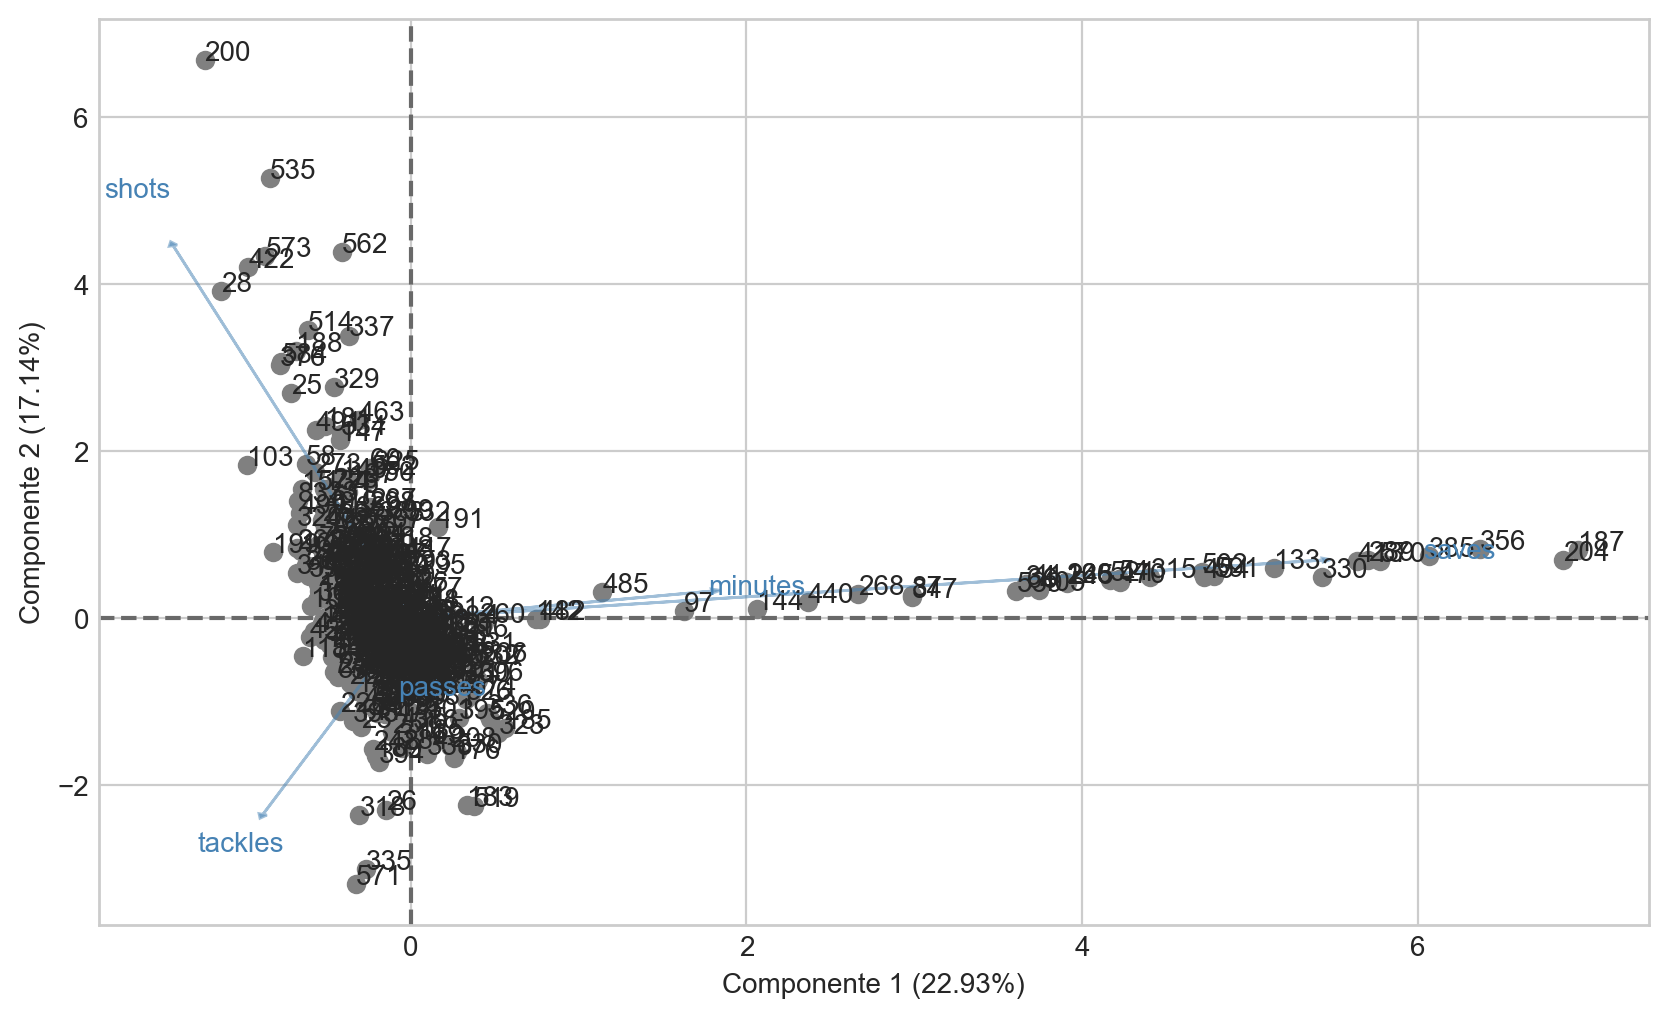

In [9]:
# Plotea la sobreposición plano-correlación
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (10,6), dpi = 200)
acp.plot_sobreposicion(ejes = [1, 2])

Segun se muestra en los graficos anteriores se puede notar que existen aproximadamente 3 clusters:
<br>1. El primero esta correlacionado con la variable shots
<br>2. El segundo esta correlacionado con las variables passes
<br>3. El tercero esta correlacionado con las variables minutes y saves

<br> Se puede ver que se da una interseccion entre los clustes 1 y 2. 

In [10]:
df2=df.iloc[:,2:7]
distintos=df2.position.unique() #obtengo valores distintos

def recodificar(df,distintos,columna):
    for e in range(len(distintos)):
        df2[e]=df[columna].where(df[columna]==distintos[e])
        df2[e]=df2[e].replace(distintos[e],int(1))
        df2[e]=df2[e].replace(np.nan, 0)
    return df2

recodificar(df2,distintos,'position')
df2=df2.iloc[:,1:9]
df2=df2.astype(int)
df2=df2.set_axis(['minutes','shots','passes','tackless','midfielder','defender','goalkeeper','forward'], axis=1)

df2


,minutes,shots,passes,tackless,midfielder,defender,goalkeeper,forward
0,16,0,6,0,1,0,0,0
1,270,1,146,8,0,1,0,0
2,74,3,28,1,1,0,0,0
3,270,1,89,11,0,1,0,0
4,90,0,17,0,0,0,1,0
...,...,...,...,...,...,...,...,...
590,4,0,2,0,1,0,0,0
591,390,0,81,0,0,0,1,0
592,356,8,84,2,0,0,0,1
593,170,1,69,2,0,1,0,0


In [11]:
acp=ACP(df2,n_componentes=3)

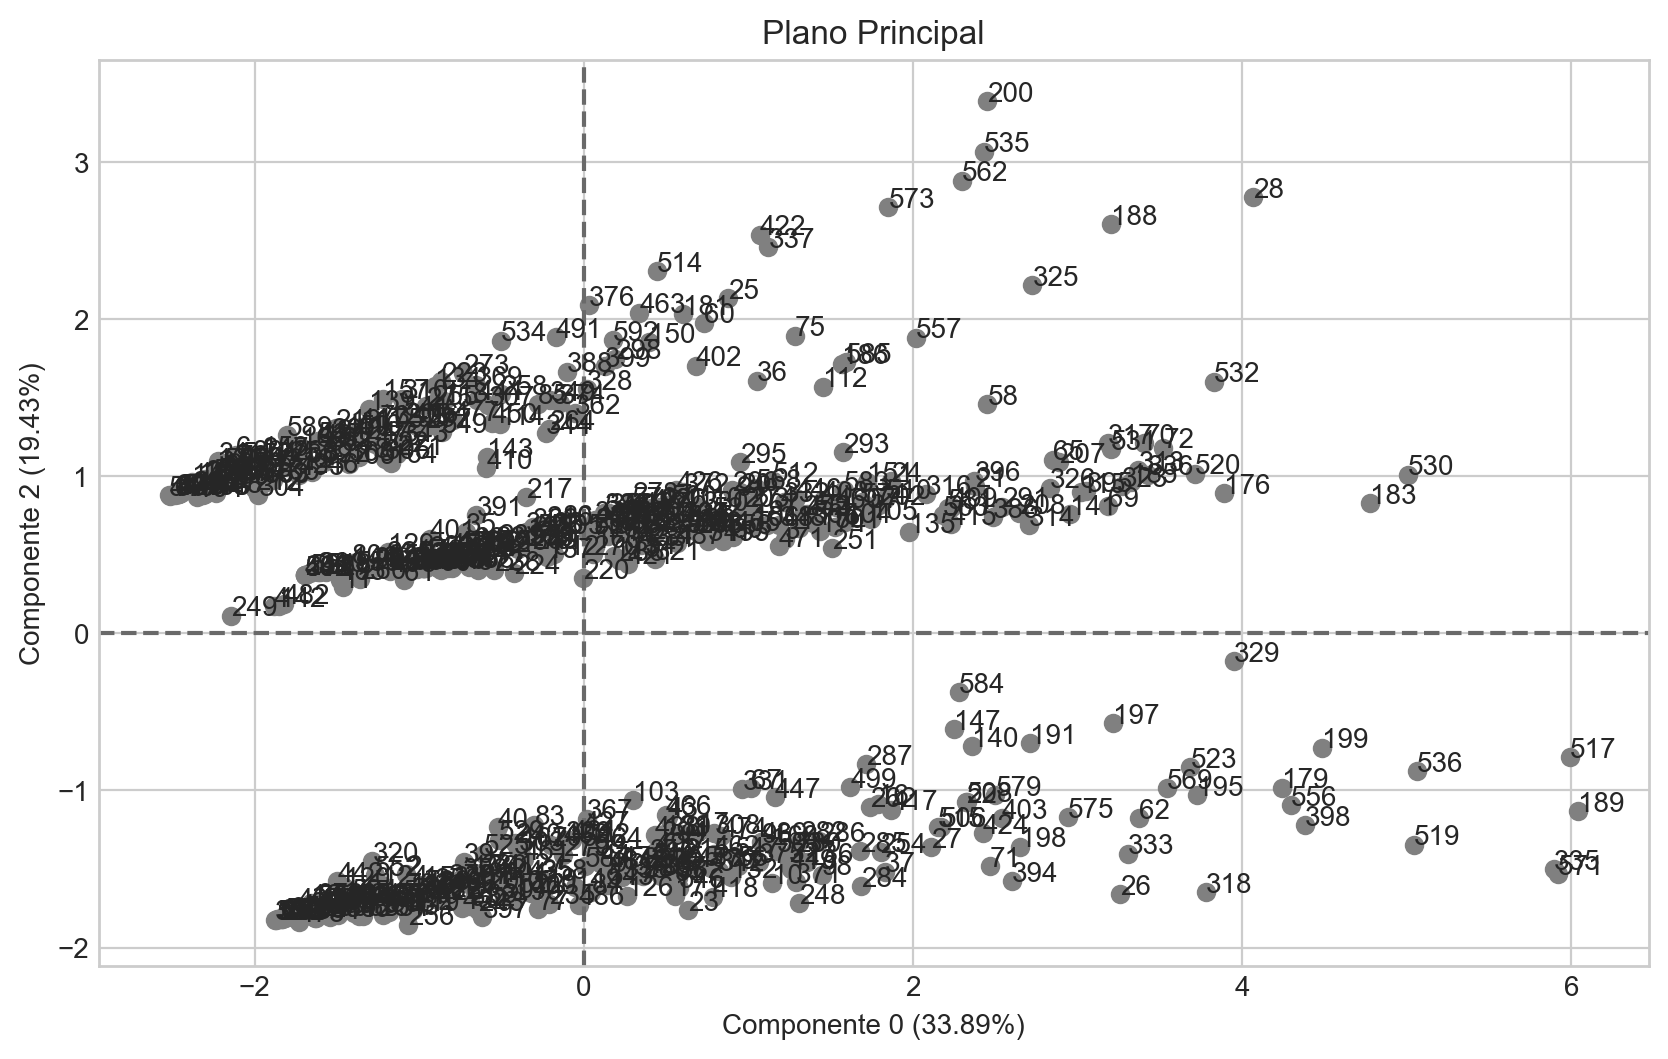

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (10,6), dpi = 200)
acp.plot_plano_principal(ejes = [0, 2])

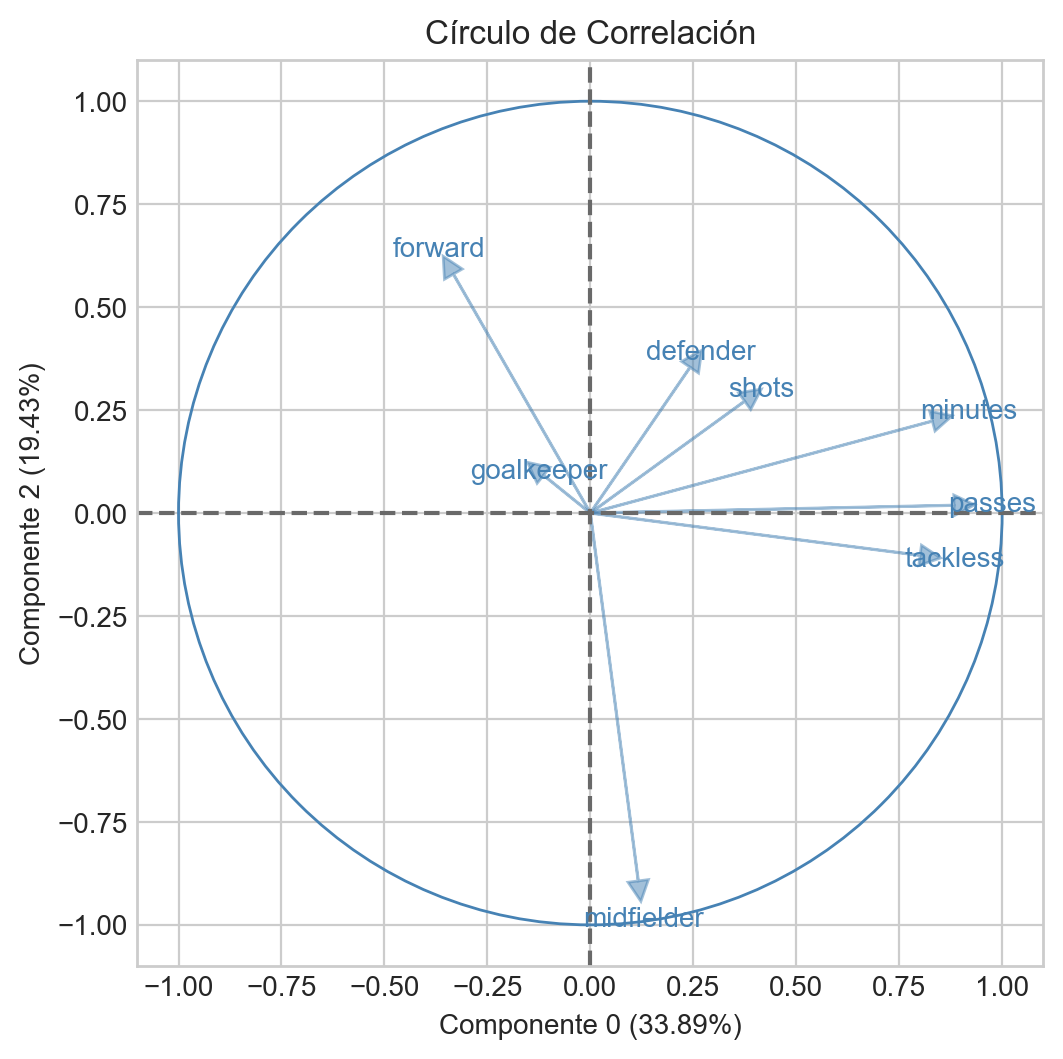

In [13]:
# Plotea el círculo de correlación
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (10,6), dpi = 200)
acp.plot_circulo(ejes = [0, 2])

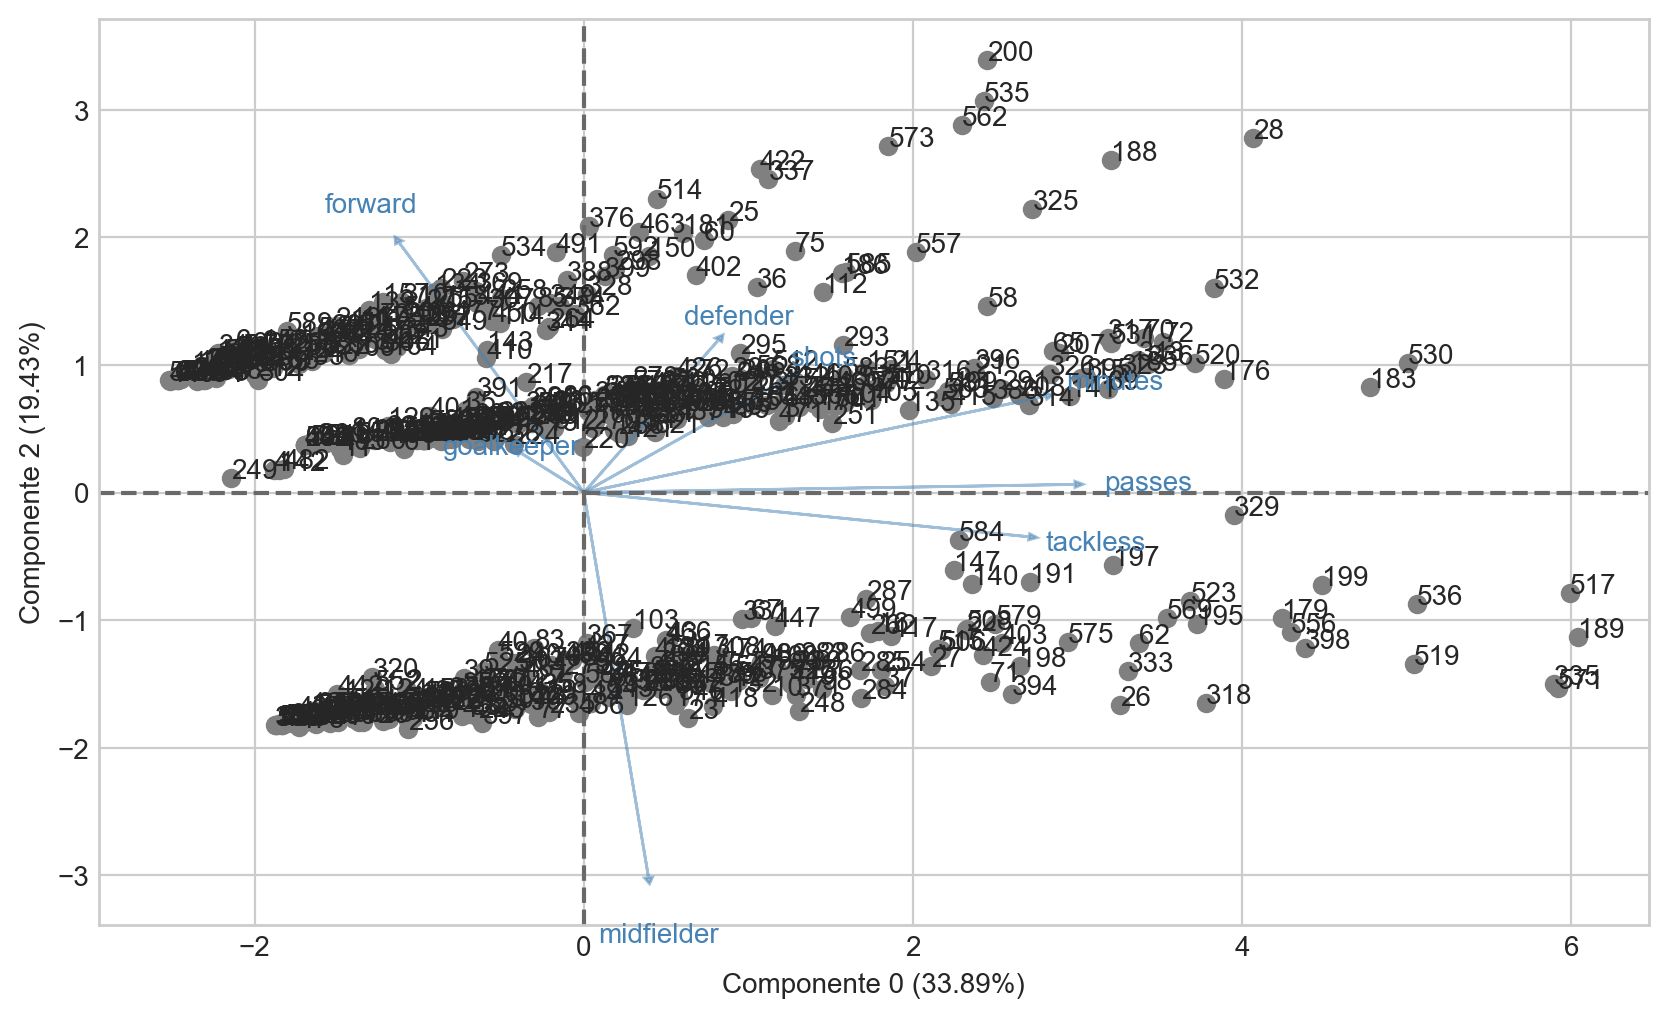

In [14]:
# Plotea la sobreposición plano-correlación
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (10,6), dpi = 200)
acp.plot_sobreposicion(ejes = [0, 2])

Luego de hacer el analisis de componentes principales, queda claro que se forman 3 clusters relacionados a las posiciones de delantero, medio campista y portero. Ademas por ejemplo se puede decir que el portero es el que mas minutos de partido juega ya que es mas extraño que se realice un cambio en esta posicion. 

El metodo con el codigo disyuntivo completo permitio la generacion de clusters mas evidentes que el realizado con solo variables numericas, por lo que se puede decir que la extension de los datos al hacer este codigo permite un analisis mas completo de los datos y dando mas informacion para la generacion de clusters. 

In [163]:
os.chdir('/Users/danielrojaschacon/Documents/Cursos/Experto ML- Promidat/Git-Promidat/Promidat/Metodos no supervisados' )

os.chdir('/Users/danielrojaschacon/Documents/Cursos/Experto ML- Promidat/Metodos no supervisados/Datos_Tarea' )
df=pd.read_csv('diabetes.csv',index_col=0,delimiter=';')
df
acp=myacp(df,n_componentes=4,columna='Diagnostico')

acp.datos


,Embarazos,Glucosa,Presion_arterial,Espesor_Piel,Insulina,IMC,Funcion_DiabetesPedigree,Edad
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


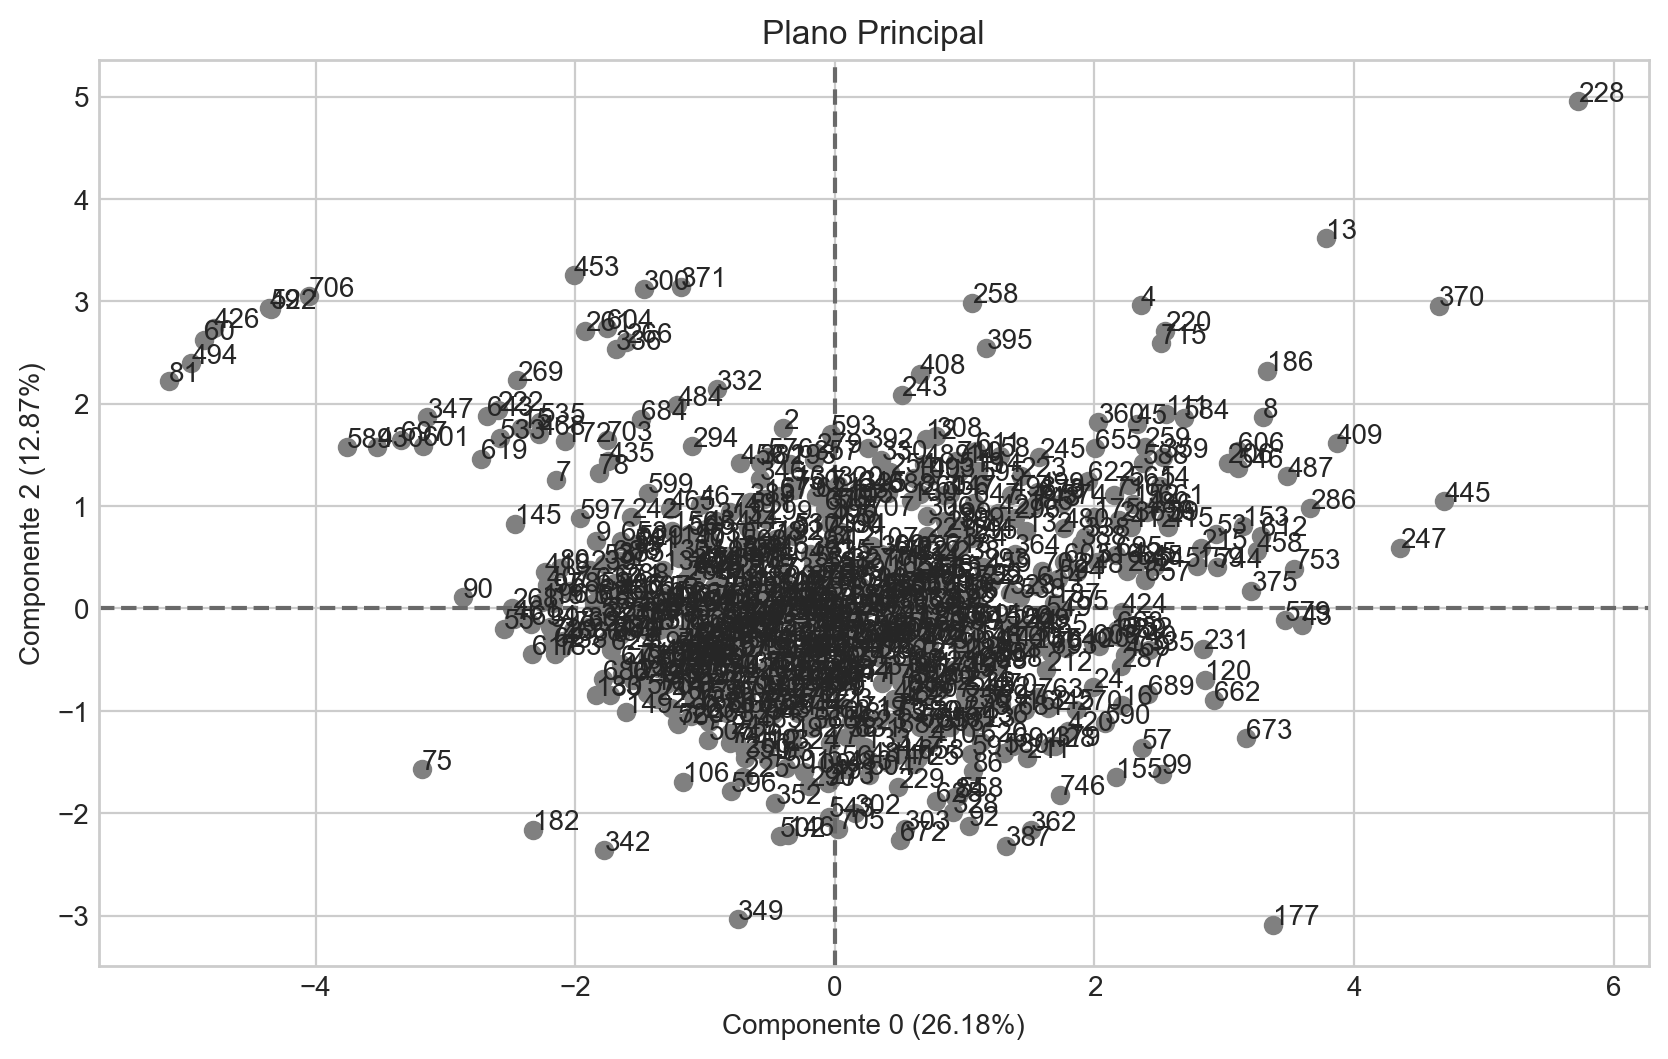

AttributeError: 'myacp' object has no attribute 'plot_plano_pincipal'